In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data[:, 0]
target[10:25]



array([15. , 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6,
       19.6, 15.2, 14.5, 15.6])

In [ ]:
df=pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Create a synthetic dataset
np.random.seed(42)
house_size = np.random.rand(100) * 1000  # House size in square feet
price = 50 * house_size + (np.random.randn(100) * 10000)  # Price with some noise

# Create a DataFrame
data = pd.DataFrame({'House Size (sq ft)': house_size, 'Price ($)': price})
print(data)


    House Size (sq ft)     Price ($)
0           374.540119  19597.476625
1           950.714306  44545.641816
2           731.993942  37517.304856
3           598.658484  10057.235064
4           156.018640   5604.213144
..                 ...           ...
95          493.795596  16531.676969
96          522.732829  25365.624375
97          427.541018  24788.570666
98           25.419127   4037.864331
99          107.891427  13666.403840

[100 rows x 2 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House Size (sq ft)  100 non-null    float64
 1   Price ($)           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


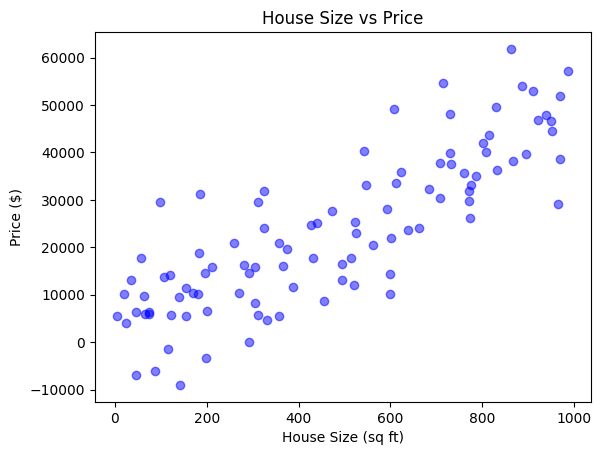

In [ ]:
# Scatter plot
plt.scatter(data['House Size (sq ft)'], data['Price ($)'], color='blue', alpha=0.5)
plt.title('House Size vs Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.show()


In [ ]:
# Features (X) and target (y)
X = data[['House Size (sq ft)']] # independent data
y = data['Price ($)']# depend data

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X


,House Size (sq ft)
0,374.540119
1,950.714306
2,731.993942
3,598.658484
4,156.018640
...,...
95,493.795596
96,522.732829
97,427.541018
98,25.419127


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
m = model.coef_[0]
print(f"Intercept (b): {b}")
print(f"Slope (m): {m}")
n = m * 374.540119 + b
n


Intercept (b): 1429.13319458568
Slope (m): 45.986473149605516


18652.912320429234

In [ ]:
y

,Price ($)
0,19597.476625
1,44545.641816
2,37517.304856
3,10057.235064
4,5604.213144
...,...
95,16531.676969
96,25365.624375
97,24788.570666
98,4037.864331


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


          Actual     Predicted
83   9743.453601   4351.957563
53  39706.610980  42579.087119
70  26242.731356  36941.946543
45  24032.239670  31896.196435
44  20849.318550  13329.511870
39  25023.098110  21670.194030
22  14658.366993  14863.835230
80  61812.916405  41120.215714
10  10183.245892   2375.741489
0   19597.476625  18652.912313
18  17676.169401  21292.761196
30  49239.101607  29367.978214
73  43742.918155  38929.328279
33  46699.817705  45065.032476
90  14200.313897   6928.850774
4    5604.213144   8603.880214
76  31763.270119  36897.136284
77   6024.769558   4834.185583
12  36324.530002  39710.234344
31  10271.984313   9270.936230


In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 65369951.371700145
R^2 Score: 0.7319688989767407


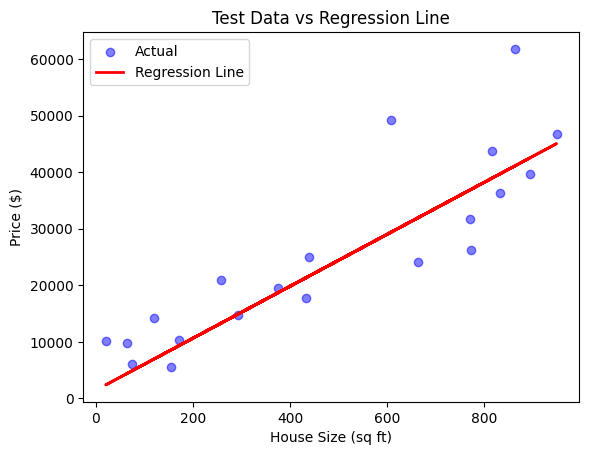

In [ ]:
# Plot the regression line with test data
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Test Data vs Regression Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
